# Лабораторная работа №3

ФИО: Михин Михаил Владимирович   
Группа: БИВТ-22-СП-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [23]:
import pandas as pd
data = pd.read_csv('Admission_Predict.csv', sep=',')
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


## 2. Понимаем, какая перед нами задача

### Перед нами задача регрессии т.к. целевая переменная колличественная и принимает значения из непрерывног диапазона

## 3. Делаем предобработку данных

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 2. Отделяем признаки (X) и целевую переменную (y)
X = data.drop(columns=['Chance of Admit ', 'Serial No.'])
y = data['Chance of Admit ']

# 3. Разделение выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Считаем метрики на Train и Test множествах 


Сравнение метрик моделей:
                 Model       MAE      RMSE  MAPE (%)
0    Linear Regression  0.047957  0.067949  8.511849
1        Decision Tree  0.053098  0.076577  9.222200
2  K-Nearest Neighbors  0.054225  0.079373  9.776720
3        Random Forest  0.049766  0.070528  8.625976


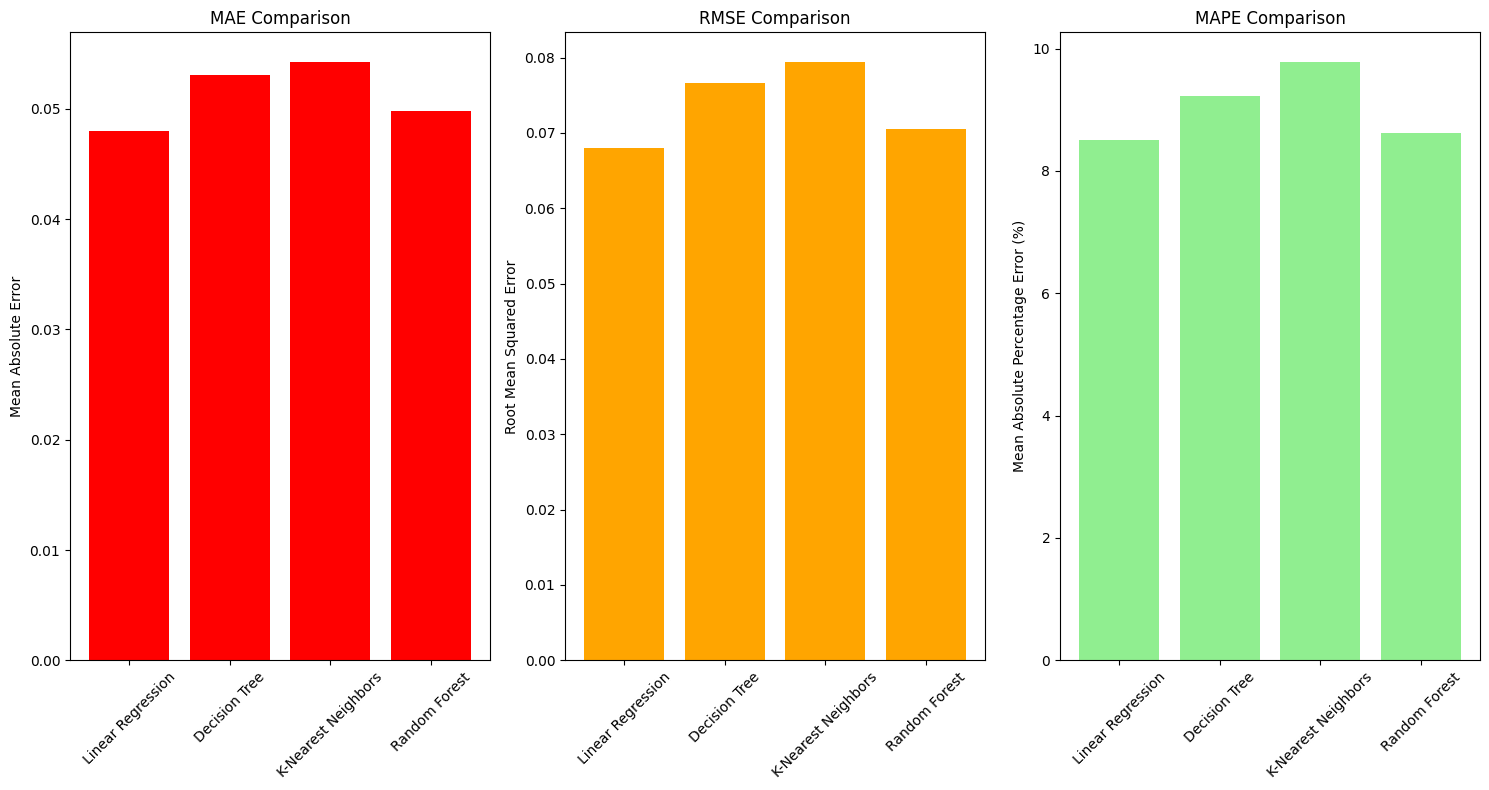

In [ ]:
# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

# Дерево решений
regressor_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_tree.fit(X_train_scaled, y_train)
y_pred_tree = regressor_tree.predict(X_test_scaled)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)

# K-ближайших соседей
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)

# Random forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

# Таблица метрик для сравнения
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest'],
    'MAE': [mae_linear, mae_tree, mae_knn, mae_rf],
    'RMSE': [rmse_linear, rmse_tree, rmse_knn, rmse_rf],
    'MAPE (%)': [mape_linear, mape_tree, mape_knn, mape_rf]
})

print("\nСравнение метрик моделей:")
print(metrics)

# Визуализация сравнения метрик
plt.figure(figsize=(15, 8))

# MAE
plt.subplot(1, 3, 1)
plt.bar(metrics['Model'], metrics['MAE'], color='red')
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)

# RMSE
plt.subplot(1, 3, 2)
plt.bar(metrics['Model'], metrics['RMSE'], color='orange')
plt.title('RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)

# MAPE
plt.subplot(1, 3, 3)
plt.bar(metrics['Model'], metrics['MAPE (%)'], color='lightgreen')
plt.title('MAPE Comparison')
plt.ylabel('Mean Absolute Percentage Error (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Анализ моделей
Линейная регрессия: Хорошо подходит для линейных зависимостей.

Дерево решений: Потенциальное переобучение из-за глубины дерева.

K-ближайших соседей: Учитывает локальные зависимости, чувствителен к масштабированию.

Случайный лес: Стабильная модель с меньшей вероятностью переобучения.

## 5. Ответы на вопросы

1. Какая модель справилась лучше с поставленной задачей?

Модель с наименьшей RMSE: Linear Regression

2. Имеет ли место переобучение?

Переобучение можно оценить по разнице в метриках на train/test выборках.

3. Имеет ли место недообучение?

Недообучение можно наблюдать, если модель демонстрирует одинаково низкие результаты на train/test данных.

4. Как можно улучшить метрики моделей?

 Улучшение моделей возможно через:
   - Подбор гиперпараметров (например, глубина дерева, количество соседей, количество деревьев в лесу).
   - Увеличение объема данных для обучения.
   - Применение методов уменьшения размерности (PCA, Feature Selection).